In [143]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
import statsmodels.api as sm
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [144]:
# reading the excel into a DataFrame
df_crowdfunding = pd.read_excel('Crowdfunding campaign.xlsx')
df_crowdfunding

,cid,pre_order_perk,amt_goal,frac_raised,tech_campaign,sbiz_campaign,fixed_fund,state,year_start,iot_plus,delivery
0,71762,0,2500,0.040000,0,1,0.0,Kentucky,2011,0.0,NaN
1,72367,0,1500,1.733333,0,0,0.0,Indiana,2012,0.0,NaN
2,73646,1,100000,1.007510,1,0,0.0,Louisiana,2012,0.0,NaN
3,74867,1,7000,0.000000,0,1,0.0,North Carolina,2012,0.0,NaN
4,82829,1,2000,1.000000,0,1,0.0,Pennsylvania,2011,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
434,242139,1,100000,2.139170,1,0,1.0,California,2013,1.0,NaN
435,242139,1,100000,2.139170,1,0,1.0,California,2013,1.0,NaN
436,242139,1,100000,2.139170,1,0,1.0,California,2013,1.0,NaN
437,250311,1,5000,1.007000,0,1,0.0,Kentucky,2012,0.0,NaN


In [145]:
# analysing the data
df_crowdfunding.describe()

,cid,pre_order_perk,amt_goal,frac_raised,tech_campaign,sbiz_campaign,fixed_fund,year_start,iot_plus,delivery
count,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,433.000000,439.000000,435.000000,150.000000
mean,168412.738041,0.612756,22841.232346,2.940869,0.530752,0.362187,0.200924,2012.740319,0.177011,0.800000
std,40862.842231,0.487676,31459.342081,5.751079,0.499623,0.481181,0.401155,0.506570,0.382118,0.375419
min,71762.000000,0.000000,500.000000,0.000000,0.000000,0.000000,0.000000,2011.000000,0.000000,0.000000
25%,142194.500000,0.000000,2000.000000,0.190100,0.000000,0.000000,0.000000,2013.000000,0.000000,1.000000
50%,163595.000000,1.000000,10000.000000,1.037100,1.000000,0.000000,0.000000,2013.000000,0.000000,1.000000
75%,200846.000000,1.000000,25000.000000,1.930000,1.000000,1.000000,0.000000,2013.000000,0.000000,1.000000
max,256198.000000,1.000000,200000.000000,25.918080,1.000000,1.000000,1.000000,2013.000000,1.000000,1.000000


In [146]:
# removing duplicates
df_crowdfunding.drop_duplicates(subset='cid', keep = 'first', inplace = True)
df_crowdfunding.drop(columns = ["cid"], inplace = True)
df_crowdfunding

,pre_order_perk,amt_goal,frac_raised,tech_campaign,sbiz_campaign,fixed_fund,state,year_start,iot_plus,delivery
0,0,2500,0.040000,0,1,0.0,Kentucky,2011,0.0,NaN
1,0,1500,1.733333,0,0,0.0,Indiana,2012,0.0,NaN
2,1,100000,1.007510,1,0,0.0,Louisiana,2012,0.0,NaN
3,1,7000,0.000000,0,1,0.0,North Carolina,2012,0.0,NaN
4,1,2000,1.000000,0,1,0.0,Pennsylvania,2011,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...
219,0,1500,1.088000,0,1,0.0,Illinois,2012,0.0,NaN
220,0,10000,1.005000,0,1,0.0,New York,2012,0.0,NaN
221,1,5000,1.007000,0,1,0.0,Kentucky,2012,0.0,NaN
222,1,2000,8.188500,1,0,0.0,Georgia,2013,0.0,1.0


In [147]:
df_crowdfunding.describe()

,pre_order_perk,amt_goal,frac_raised,tech_campaign,sbiz_campaign,fixed_fund,year_start,iot_plus,delivery
count,224.000000,224.000000,224.000000,224.000000,224.000000,219.000000,224.000000,221.000000,53.000000
mean,0.491071,17412.232143,1.749669,0.459821,0.415179,0.214612,2012.651786,0.117647,0.801887
std,0.501040,31524.139163,3.644054,0.499499,0.493856,0.411493,0.563618,0.322921,0.384053
min,0.000000,500.000000,0.000000,0.000000,0.000000,0.000000,2011.000000,0.000000,0.000000
25%,0.000000,1262.500000,0.005571,0.000000,0.000000,0.000000,2012.000000,0.000000,1.000000
50%,0.000000,5000.000000,1.014500,0.000000,0.000000,0.000000,2013.000000,0.000000,1.000000
75%,1.000000,15000.000000,1.750000,1.000000,1.000000,0.000000,2013.000000,0.000000,1.000000
max,1.000000,200000.000000,25.918080,1.000000,1.000000,1.000000,2013.000000,1.000000,1.000000


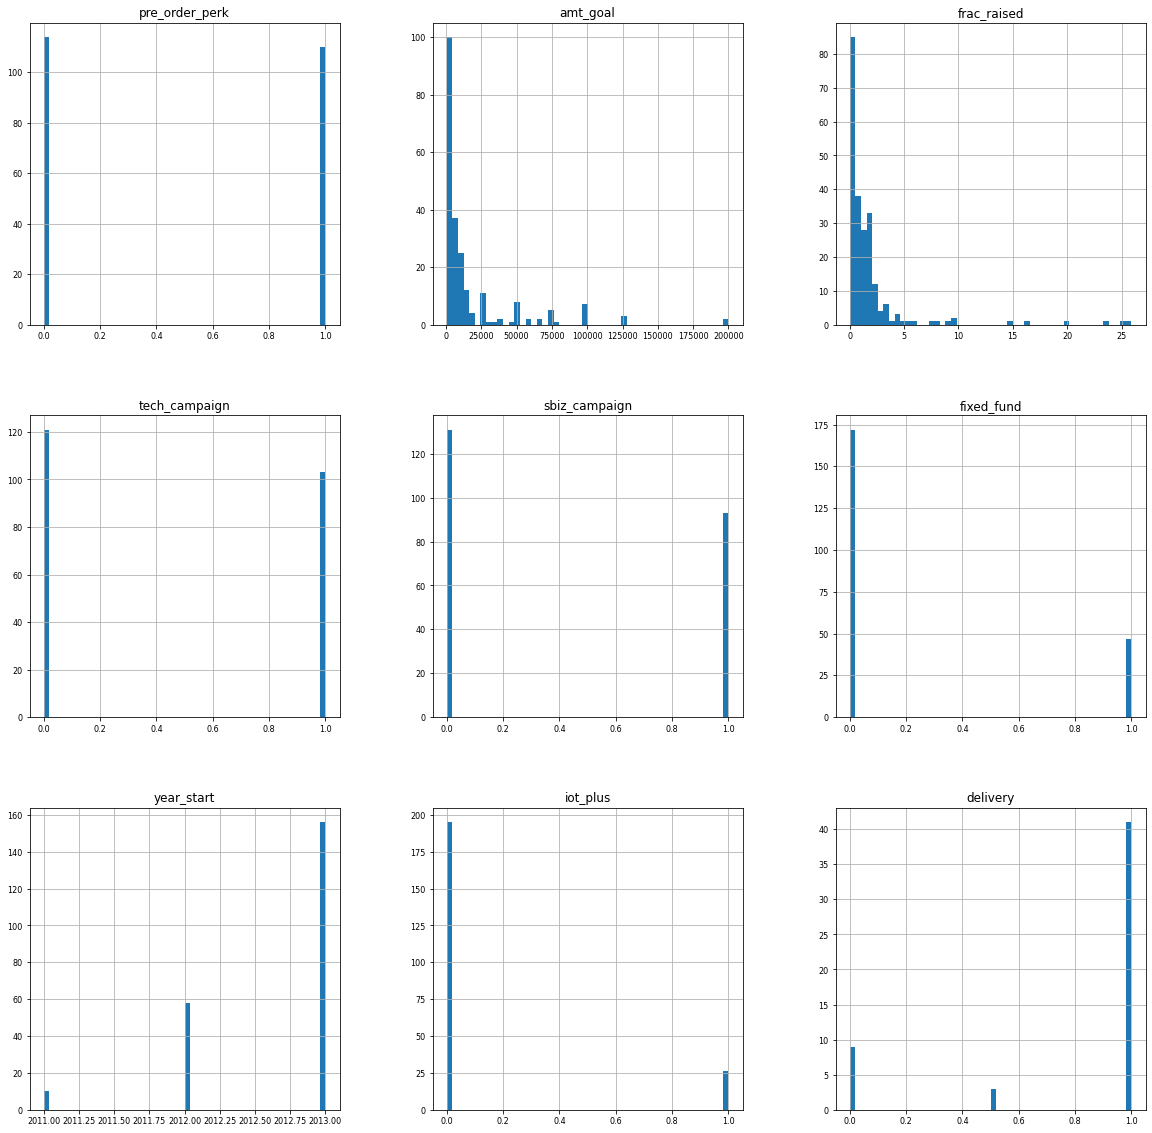

In [148]:
# Histograms
df_crowdfunding.hist(figsize=(20,20), bins=50, xlabelsize=8, ylabelsize=8)
plt.show()

<AxesSubplot:>

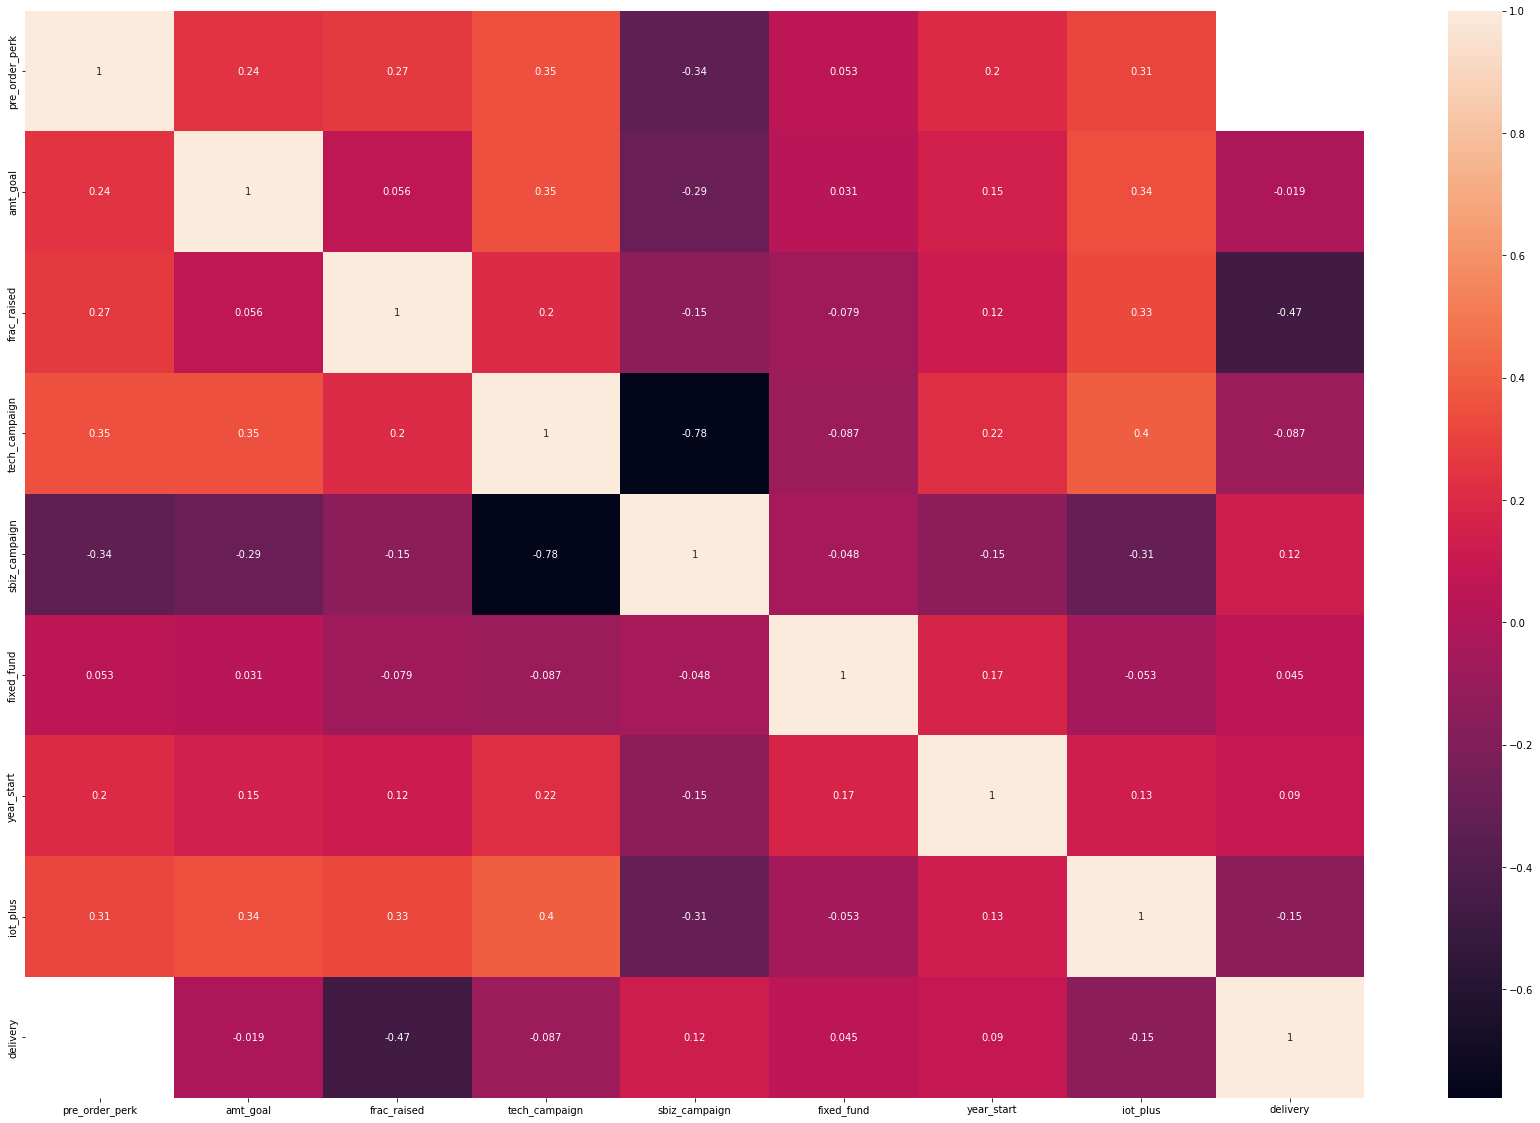

In [149]:
# Heat Map of the data
plt.figure(figsize = (30,20))
sns.heatmap(df_crowdfunding.corr(), annot = True)

In [325]:
target = df_crowdfunding.frac_raised
features = df_crowdfunding.drop(columns = ["frac_raised",'delivery','state'])

In [326]:
target

0      0.040000
1      1.733333
2      1.007510
3      0.000000
4      1.000000
         ...   
219    1.088000
220    1.005000
221    1.007000
222    8.188500
223    0.000000
Name: frac_raised, Length: 224, dtype: float64

In [327]:
features

,pre_order_perk,amt_goal,tech_campaign,sbiz_campaign,fixed_fund,year_start,iot_plus
0,0,2500,0,1,0.0,2011,0.0
1,0,1500,0,0,0.0,2012,0.0
2,1,100000,1,0,0.0,2012,0.0
3,1,7000,0,1,0.0,2012,0.0
4,1,2000,0,1,0.0,2011,0.0
...,...,...,...,...,...,...,...
219,0,1500,0,1,0.0,2012,0.0
220,0,10000,0,1,0.0,2012,0.0
221,1,5000,0,1,0.0,2012,0.0
222,1,2000,1,0,0.0,2013,0.0


In [328]:
features['year_start']=features['year_start'].astype(str)
print(features.dtypes)

pre_order_perk      int64
amt_goal            int64
tech_campaign       int64
sbiz_campaign       int64
fixed_fund        float64
year_start         object
iot_plus          float64
dtype: object


In [329]:
cat_features = pd.get_dummies(features)
cat_features.dropna(inplace = True)
target.dropna(inplace=True)
target = target.reindex_like(cat_features)
cat_features.describe()

,pre_order_perk,amt_goal,tech_campaign,sbiz_campaign,fixed_fund,iot_plus,year_start_2011,year_start_2012,year_start_2013
count,216.000000,216.000000,216.000000,216.000000,216.000000,216.00000,216.000000,216.000000,216.000000
mean,0.509259,17533.518519,0.462963,0.412037,0.212963,0.12037,0.046296,0.259259,0.694444
std,0.501076,31481.563736,0.499785,0.493345,0.410353,0.32615,0.210614,0.439246,0.461712
min,0.000000,500.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,0.000000,1462.500000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,1.000000,5000.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000
75%,1.000000,15000.000000,1.000000,1.000000,0.000000,0.00000,0.000000,1.000000,1.000000
max,1.000000,200000.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


In [155]:
X_train, X_test, y_train, y_test = train_test_split(cat_features, target, random_state = 0, test_size = 0.2)

In [330]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

{'alpha': 100}
-0.13033513877567865


/Users/gioong/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='frac_raised', ylabel='Density'>

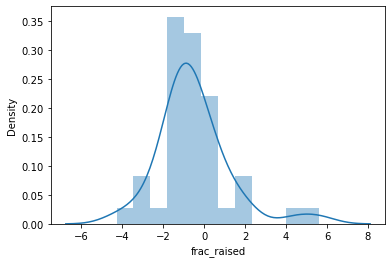

In [331]:
# Ridge Regression
ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='r2',cv=5)
ridge_regressor.fit(X_train_scaled,y_train)

print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

prediction_ridge=ridge_regressor.predict(X_test_scaled)
sns.distplot(y_test-prediction_ridge)

{'alpha': 5}
-0.11597859201809677


/Users/gioong/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='frac_raised', ylabel='Density'>

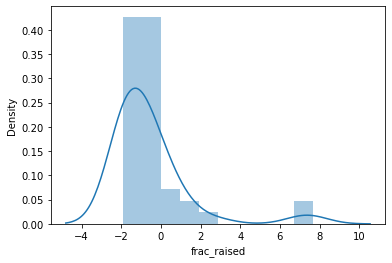

In [332]:
# Lasso Regression
lasso=Lasso()
parameters={'alpha':[0.0001,0.001,0.01,1,5,10,20,30,35,40,45,50,55,100]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='r2',cv=5)

lasso_regressor.fit(X_train_scaled,y_train)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

prediction_lasso=lasso_regressor.predict(X_test_scaled)


sns.distplot(y_test-prediction_lasso)

In [335]:
# KNN Regression
knn = KNeighborsRegressor()
neighbors = list(range(1,51))

param_grid = dict(n_neighbors = neighbors)
knn_grid = GridSearchCV(knn, param_grid, cv=10)

knn_grid.fit(cat_features, target)
y_pred = list(knn_grid.predict(cat_features))
knn_grid.score(cat_features, target) 
knn_grid.best_params_

{'n_neighbors': 48}

In [336]:
print(mean_squared_error(target,y_pred))
print(r2_score(target,y_pred))

13.45128339909695
0.012572106120662507


Text(0, 0.5, 'Mean Squared Error')

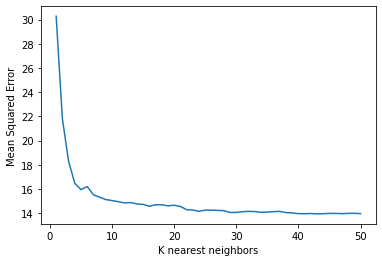

In [337]:
# Graphing the MSE for each hyperparameter
error = []
for k in range(1,51):
    knn = KNeighborsRegressor(n_neighbors=k)
    y_pred = cross_val_predict(knn, cat_features, target, cv=5)
    error.append(mean_squared_error(target,y_pred))
plt.plot(range(1,51),error)
plt.xlabel('K nearest neighbors')
plt.ylabel('Mean Squared Error')

Text(0, 0.5, 'R Squared')

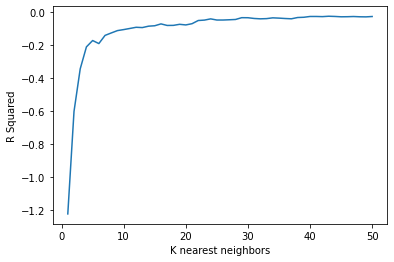

In [338]:
# Graphing the r2 for each hyperparameter
error = []
for k in range(1,51):
    knn = KNeighborsRegressor(n_neighbors=k)
    y_pred = cross_val_predict(knn, cat_features, target, cv=5)
    error.append(r2_score(target,y_pred))
plt.plot(range(1,51),error)
plt.xlabel('K nearest neighbors')
plt.ylabel('R Squared')

In [339]:
print(mean_squared_error(target,y_pred))
print(r2_score(target,y_pred))

13.956427603168493
-0.02450937248123841


13.377846932515167
0.017962908870061023


Text(0, 0.5, 'Mean Squared Error')

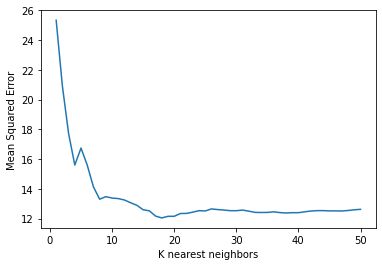

In [340]:
# Graphing the MSE for each hyperparameter
classifier_pipeline = make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=10))
y_pred = cross_val_predict(classifier_pipeline, cat_features, target, cv=5)

print(mean_squared_error(target,y_pred))
print(r2_score(target,y_pred))

error = []
for k in range(1,51):
    classifier_pipeline = make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=k))
    y_pred = cross_val_predict(classifier_pipeline, cat_features, target, cv=5)
    error.append(mean_squared_error(target,y_pred))
    
plt.plot(range(1,51),error)
plt.xlabel('K nearest neighbors')
plt.ylabel('Mean Squared Error')

Text(0, 0.5, 'R Squared')

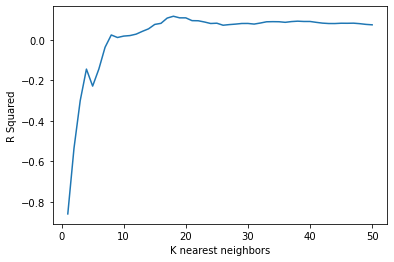

In [341]:
error = []
for k in range(1,51):
    classifier_pipeline = make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=k))
    y_pred = cross_val_predict(classifier_pipeline, cat_features, target, cv=5)
    error.append(r2_score(target,y_pred))
    
plt.plot(range(1,51),error)
plt.xlabel('K nearest neighbors')
plt.ylabel('R Squared')

In [342]:
X_train_df, X_test_df = pd.DataFrame(X_train_scaled), pd.DataFrame(X_test_scaled)

In [343]:

for deg in range(1,5):
    poly = PolynomialFeatures(degree = deg)
    X_train_poly, X_test_poly = poly.fit_transform(X_train_df), poly.fit_transform(X_test_df)

    model = LinearRegression()
    model = model.fit(X_train_poly, y_train)

    prediction = model.predict(X_test_poly)

    mse = mean_squared_error(y_test, prediction)
    r2 = r2_score(y_test, prediction) 

    print("\nThe model performance for training set")
    print("--------------------------------------")
    print('MSE is {}'.format(mse))
    print('R2 is {}'.format(r2))

    print("\n")


The model performance for training set
--------------------------------------
MSE is 3.3807778396813934
R2 is 0.17480988417942145



The model performance for training set
--------------------------------------
MSE is 8.315849871828844
R2 is -1.029756891546497



The model performance for training set
--------------------------------------
MSE is 2.1212721938752346e+24
R2 is -5.177663041934282e+23



The model performance for training set
--------------------------------------
MSE is 1.0510804151422802e+21
R2 is -2.5655077341306123e+20


